In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

from datetime import date
from joblib import dump

np.random.seed(1)

/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000/hmap_Pat0.350000_Tat0.350000.txt
/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000/hmap_Pat0.355000_Tat0.355000.txt
/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000/hmap_Pat0.360000_Tat0.360000.txt
/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000/hmap_Pat0.365000_Tat0.365000.txt
/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX-23.000000terrH-1.000000/hmap_Pat0.370000_Tat0.370000.txt
/home/swang597/Documents/Research/c

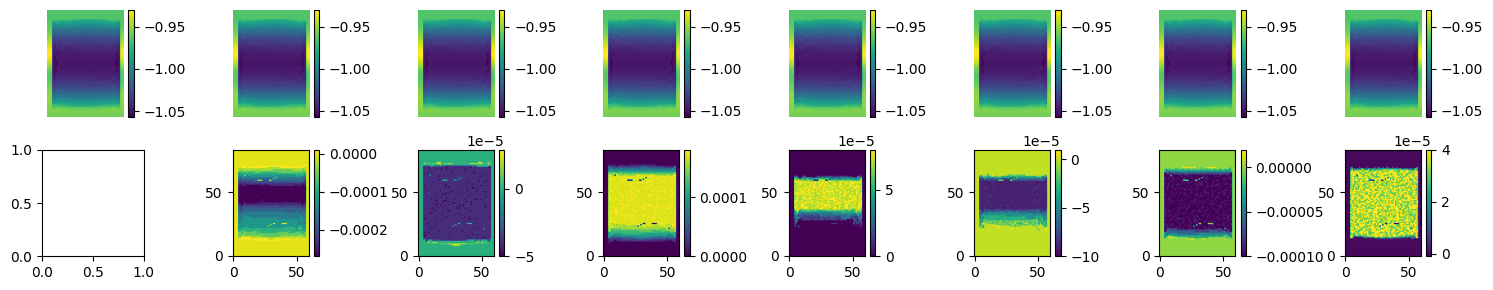

In [21]:
# Read data
dt=5e-4
terrain_grid=0.005
time_tot=1.5
dt_HM=dt*10 # 
terrain_initX = -23
terrain_initH = -1

foldername_SCM_path = '/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/'
foldername_SCM_name = f"TIRE_TEST_RIG_dt{dt:.6f}_terrGrid{terrain_grid:.6f}terrX{terrain_initX:.6f}terrH{terrain_initH:.6f}/"
folder = foldername_SCM_path + foldername_SCM_name

# folder = "/home/swang597/Documents/Research/chrono_fork_radu/project_TireTestRig/build/DEMO_OUTPUT/TIRE_TEST_RIG_dt0.000500_terrGrid0.005000terrX0.000000terrH-0.700000//"
# dt = 5e-4
# terrain_grid = 0.005

fig, axes = plt.subplots(2, 8, figsize=(15, 3))  # Adjust the size as needed
for istep in range(8):
    time = dt * (istep*10 + 700)
    filename = folder + f"hmap_Pat{time:.6f}_Tat{time:.6f}.txt"
    print(filename)
    data_img = np.loadtxt(filename)
    vmin, vmax = np.min(data_img), np.max(data_img)
    # Display the image data on the corresponding subplot
    im0 = axes[0,istep].imshow(data_img, cmap='viridis',origin='lower')#,vmin=vmin, vmax=vmax)
    fig.colorbar(im0, ax=axes[0,istep])#,  label='Height')
    axes[0,istep].axis('off')  # Hide the axis
    if istep > 0:
        d_data_img = data_img - data_img_prev
        im1 = axes[1,istep].imshow(d_data_img, cmap='viridis',origin='lower') #,vmin=vmin, vmax=vmax)
        fig.colorbar(im1, ax=axes[1,istep])#,  label='Height')
    data_img_prev = data_img
    
    # ax.set_title(npy_file)  # Set the title to the file name


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [96]:
print(data_img.shape)

(84, 60)


In [97]:
state_name = folder + "ROVER_states_saved.txt"
force_name = folder + "SCM_force_saved.txt"

data_state = np.loadtxt(state_name)
data_force = np.loadtxt(force_name) 



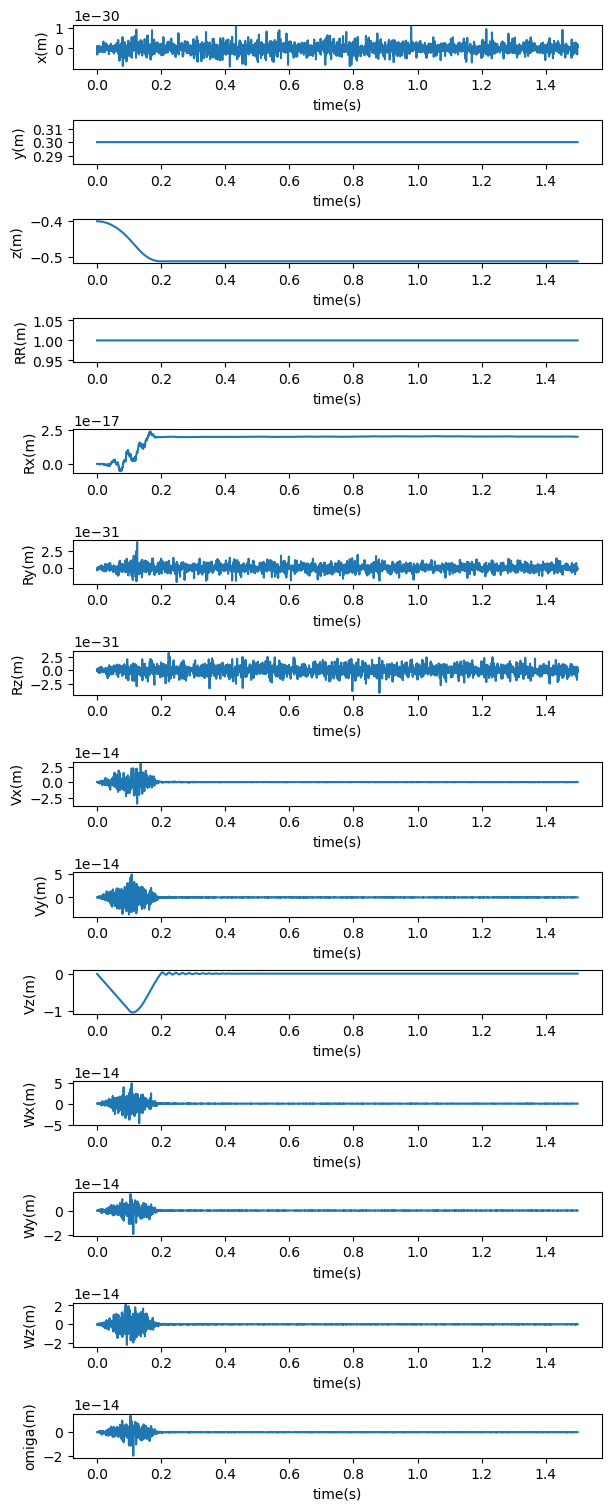

In [98]:
fig, ax = plt.subplots(14, 1, constrained_layout=True,figsize=(6,15))
ylabel_coor = ['x','y','z','RR','Rx','Ry','Rz','Vx','Vy','Vz','Wx','Wy','Wz','omiga']
marker_list = ['-',':','-','--']
wheel_list = ['FL','FR','BL','BR']
for iax in range(len(ylabel_coor)):
    ax[iax].plot(data_state[:,0],data_state[:,iax+1])
    ax[iax].set(xlabel='time(s)', ylabel= ylabel_coor[iax]+'(m)')
    # ax[iax].set_xlim(0,2)
# ax[0].legend()
# ax[0].set_ylim(1,6)
# ax[1].set_ylim(2.09,2.10)
# ax.set_title(keyword)
# fig.savefig('Fig/'+keyword+'_XX.png')

